# Lab 0.1: Data Exploration

## Step 1: Load Raw Data

In [5]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

# Import Data
inventory_df = pd.read_csv("./data/Inventory.csv")
mm_df = pd.read_csv("./data/MaterialMaster.csv")

#### Customer Preview

In [6]:
# Show Customers Data
inventory_df.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY


#### Products Preview

In [7]:
# Show Products Data
mm_df.head()

,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
0,MAT-0001,P-002,3,40
1,MAT-0002,P-001,8,15
2,MAT-0003,P-004,2,35
3,MAT-0004,P-002,3,35
4,MAT-0005,P-002,5,20


In [9]:
joined_df = inventory_df.merge(mm_df, on='MATERIAL_NAME', how='left')

joined_df.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY,P-002,10,30
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY,P-001,4,5
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY,P-001,4,5
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY,P-001,4,5
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY,P-001,4,5


#### Sales Orders Preview

In [4]:
# Show Sales Orders Data
sales_orders_df.head()

,order_id,timestamp,customer_id,product_id,quantity,unit_price,total_price
0,O2209,2024-11-21 21:43:00.000000,C152,P063,1,41.61,41.61
1,O2224,2024-08-07 13:54:00.000000,C028,P032,4,9.36,37.44
2,O3388,2024-09-11 00:11:00.000000,C027,P037,2,15.93,31.86
3,O2823,2024-02-16 04:12:00.000000,C103,P048,1,26.48,26.48
4,O7132,2024-11-30 20:14:00.000000,C023,P060,1,16.94,16.94


## Step 2: Merge Data

In [22]:
# Merge orders with customers and products info
merged_df = sales_orders_df.merge(customers_df, on='customer_id', how='left')
merged_df.rename(columns={'name': 'customer_name'}, inplace=True)

merged_df = merged_df.merge(products_df[['product_id','name','description','category']], on='product_id', how='left')
merged_df.rename(columns={'name': 'product_name'}, inplace=True)


# Drop records with null timestamp and extract year and month from timestamp
merged_df = merged_df.dropna(subset=['timestamp'])
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])
merged_df['year'] = merged_df['timestamp'].dt.year.astype(int)
merged_df['month'] = merged_df['timestamp'].dt.month.astype(int)

# Filter only for records in 2024
merged_df = merged_df[merged_df['year'] == 2024]

# Show Data
merged_df.head()

,order_id,timestamp,customer_id,product_id,quantity,unit_price,total_price,customer_name,region,birthday,country,product_name,description,category,year,month
0,O2209,2024-11-21 21:43:00,C152,P063,1,41.61,41.61,Fred Hunt,West,1982-09-11,Indonesia,Boy Backpack,Recent mean try view main.,Apparel,2024,11
1,O2224,2024-08-07 13:54:00,C028,P032,4,9.36,37.44,Jeffery Johnson,Central,1962-01-24,Malaysia,Big Instant Noodles,Discussion another never agree concern article...,Snacks,2024,8
2,O3388,2024-09-11 00:11:00,C027,P037,2,15.93,31.86,Blake Haynes,South,1954-10-21,Vietnam,Political Laundry Bag,Response ability by everybody debate region ci...,Home,2024,9
3,O2823,2024-02-16 04:12:00,C103,P048,1,26.48,26.48,Melissa Lyons,Central,1984-02-25,Indonesia,Young Rice Crackers,And now arm.,Snacks,2024,2
4,O7132,2024-11-30 20:14:00,C023,P060,1,16.94,16.94,Paul Holland,North,1953-06-18,Malaysia,See Sticky Notes,Technology value anything will ability girl mo...,Stationery,2024,11


In [23]:
# Save dataframe to csv
merged_df.to_csv("Data_V1.csv")

## Step 3: Data Aggregation

In [24]:
# Group the data by Month
orders_agg_df = merged_df.groupby(['year','month']).agg(
    total_products_quantity=('quantity', 'sum'),
    avg_products_per_order=('quantity', 'mean'),
    total_revenue=('total_price', 'sum'),
    avg_sales_per_order=('total_price', 'mean'),
    total_orders=('order_id', 'count'),
    unique_products=('product_id', 'nunique')
)

# Show Data
orders_agg_df.head(20)

total_products_quantity  avg_products_per_order  total_revenue  \
year month                                                                   
2024 1                         1054                2.046602       24350.18   
     2                         1203                2.261278       29805.62   
     3                        31230               52.932203     1108487.95   
     4                        20745               58.601695      315334.31   
     5                         1412                2.104322       36679.14   
     6                        21175               36.890244      848550.36   
     7                         1144                2.087591       29370.09   
     8                         1292                2.175084       32385.71   
     9                         1122                2.085502       28258.64   
     10                        6605                9.060357      263940.71   
     11                        1984                2.185022       51361.74   
     12                        1123                2.034420       27202.02   

            avg_sales_per_order  total_orders  unique_products  
year month                                                      
2024 1                47.281903           515               99  
     2                56.025602           532               99  
     3              1878.793136           590               99  
     4               890.774887           354               94  
     5                54.663398           671               99  
     6              1478.310732           574               98  
     7                53.595055           548              100  
     8                54.521397           594               99  
     9                52.525353           538              100  
     10              362.058587           729               99  
     11               56.565793           908              100  
     12               49.279022           552               99

In [25]:
# Save dataframe to csv
orders_agg_df.to_csv("Data_V2.csv")

## Step 4: Plot Graph

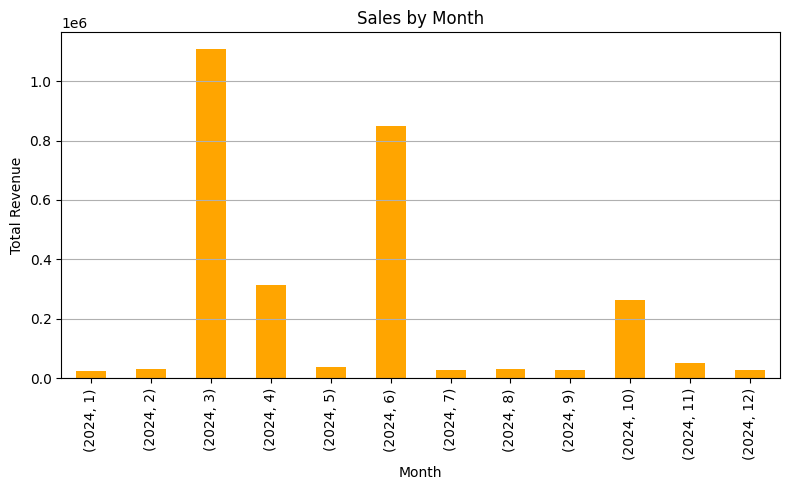

In [26]:
# === Plot 3: Sales by Month ===
orders_agg_df['total_revenue'].plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('image\\Sales_by_Month.png')
plt.show()

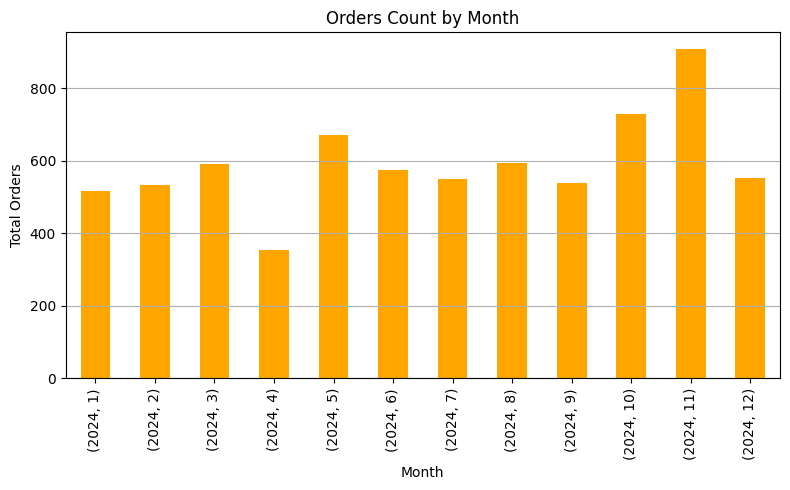

In [27]:
# === Plot 3: Sales by Month ===
orders_agg_df['total_orders'].plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Orders Count by Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('image\\Orders_Count_by_Month.png')
plt.show()

## Exercise
##### Find the Top 10 Best Selling Products based on the existing data and plot the Bar Chart.